Author - Priyanka Vasanthakumari

# Tabular Methods

In this assignment, you will solve the FrozenLake-v0 environment from OpenAI gym using 
* Policy Iteration 

Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.The surface is described using a grid like the following 

        SFFF
        FHFH
        FFFH
        HFFG
    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom
    G : goal, where the frisbee is located
    
The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.

source: https://gym.openai.com/envs/FrozenLake-v0/  

## The Environment Parameters
* Use discount factor, $\gamma = 0.9$
* The environment is slippery, ie., the transition kernel is stochastic
* The environment consists of 16 states. (env.nS: count of state (int))
* The agent can take 4 actions (env.nA: count of action (int))
* The transition kernel P is a dictionary. 
* P[state][action] is tuples with (probability, nextstate, reward, terminal)
* **Use the following code snippet to set up the gym environemnt for all the questions**

In [ ]:
import gym
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})
env = gym.make('D4x4-FrozenLake-v0')
gamma = 0.9

In [ ]:
#Obtaining environment details 
print('Number of Actions', env.nA) 
print('Number of States ', env.nS)
print('P[10,3]', env.P[14][2])
P = env.P[15][3]
len(P)

Number of Actions 4
Number of States  16
P[10,3] [(0.3333333333333333, 14, 0.0, False), (0.3333333333333333, 15, 1.0, True), (0.3333333333333333, 10, 0.0, False)]


1

## Generating a Heatmap 


In [ ]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    plt.show()



# Policy Iteration

Policy converged
Optimal values
[0.06852382 0.06112474 0.07422593 0.05561581 0.09155073 0.
 0.11212405 0.         0.14522701 0.24737939 0.29954114 0.
 0.         0.37986166 0.63898415 0.        ]
Optimal Q values
[[0.06852382 0.06631701 0.06631701 0.05939689]
 [0.03886233 0.04279698 0.04059018 0.06112474]
 [0.07422593 0.06864021 0.07257487 0.05726687]
 [0.03893911 0.03893911 0.03335339 0.05561581]
 [0.09155073 0.07101616 0.06409604 0.04798925]
 [0.         0.         0.         0.        ]
 [0.11212405 0.08986163 0.11212405 0.02226242]
 [0.         0.         0.         0.        ]
 [0.07101616 0.11777232 0.10166554 0.14522701]
 [0.15751775 0.24737939 0.20381791 0.13342311]
 [0.29954114 0.26590538 0.22533029 0.10784661]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18816713 0.30565081 0.37986166 0.26590538]
 [0.39551245 0.63898415 0.6148895  0.53715125]
 [0.         0.         0.         0.        ]]
Optimal policy
[0. 3. 0. 3. 0. 0. 

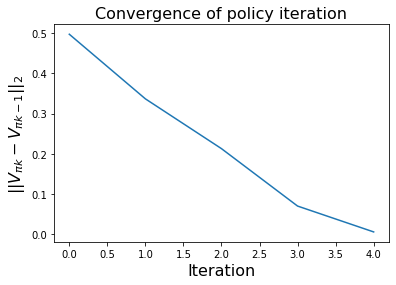

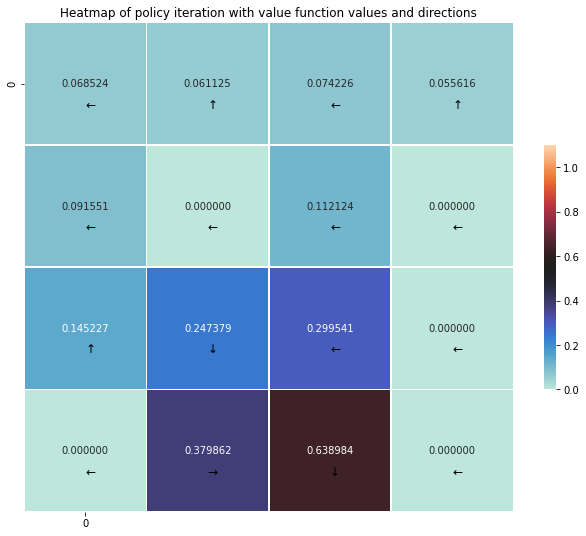

In [ ]:

env.reset()
import numpy as np
import matplotlib.pyplot as plt

def policy_evaluation (env, policy,theta,gamma,H):                               #Evaluate the value of a policy
  V = np.zeros(env.nS)
  for k in range(H):
    Vs1 = V.copy()
    for s in range (env.nS):
      V_temp = 0
      P = env.P[s][policy[s]]
      for s1 in range (0, len(P)):
        V_temp += P[s1][0]*(P[s1][2] + gamma*V[P[s1][1]])                        
      V[s] = V_temp
    if (np.linalg.norm(V-Vs1, ord = np.inf)<theta):                              #Check convergence
      break
  return V

def policy_improvement(env, policy, V, gamma):                                   #Improve the policy - greedy method
  pi = np.zeros(env.nS)
  q = np.zeros((env.nS, env.nA))
  for s in range (0,env.nS):
    v_temp = np.zeros(env.nA)
    for a in range (0,env.nA):
      P = env.P[s][a]
      for s1 in range (0,len(P)):
        v_temp[a] += P[s1][0]*(P[s1][2] + gamma*V[P[s1][1]])
    pi[s] = np.argmax(v_temp) 
    q[s,:] = v_temp
  return pi, q


def policy_iteration (env, theta, gamma, H):
  actions = np.array([0.0, 1.0, 2.0, 3.0])
  policy = np.random.choice(actions, env.nS)                                     #Start with a random policy
  q = np.zeros((env.nS,env.nA))
  value = np.zeros(env.nS)
  decay = []
  for k in range (H):
    old_policy = policy.copy()
    old_value = value.copy()
    value = policy_evaluation(env, policy,theta,gamma,10000)
    policy, q_fun = policy_improvement(env, policy, value, gamma)
    v_fun = np.max(q_fun, axis = 1)
    decay.append(np.linalg.norm(value-old_value, ord=2))
    if np.all(policy==old_policy):
      print ('Policy converged')
      break
  return policy, v_fun, decay, q_fun

policy, stateValues,decay, q_values = policy_iteration (env, theta = 1e-04, gamma = 0.9, H=10000)
print("Optimal values")
print(stateValues)
print("Optimal Q values")
print(q_values)
print("Optimal policy")
print(policy)

plt.plot(decay) 
plt.xlabel('Iteration',fontsize=16)
plt.ylabel('$||V_{\pi k} - V_{\pi k-1}||_2$',fontsize=16)
plt.title('Convergence of policy iteration', fontsize = 16)
#Heat map
fancy_visual(stateValues,policy)

